In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       730 non-null    float64
 1   TM      730 non-null    float64
 2   Tm      730 non-null    float64
 3   SLP     730 non-null    float64
 4   H       730 non-null    float64
 5   VV      730 non-null    float64
 6   V       730 non-null    float64
 7   VM      730 non-null    float64
 8   PM 2.5  730 non-null    float64
dtypes: float64(9)
memory usage: 51.5 KB


In [ ]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,25.572329,32.249726,19.285068,1008.180000,64.097260,1.892329,6.632877,15.702877,107.929150
std,7.279810,6.840215,7.452854,7.556041,15.438985,0.686832,3.969204,7.657372,82.576607
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,18.900000,27.600000,12.025000,1001.300000,55.000000,1.400000,3.500000,11.100000,43.583333
50%,27.700000,34.100000,21.000000,1008.450000,66.000000,1.900000,6.300000,14.800000,81.729167
75%,31.200000,36.900000,25.900000,1015.000000,75.000000,2.400000,9.100000,18.300000,153.934375
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [ ]:
if df.duplicated().any():
  print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()
df=df.dropna()

,0
T,0
TM,0
Tm,0
SLP,0
H,0
VV,0
V,0
VM,0
PM 2.5,0


In [ ]:
df.shape

(730, 9)

array([[<Axes: title={'center': 'T'}>, <Axes: title={'center': 'TM'}>,
        <Axes: title={'center': 'Tm'}>],
       [<Axes: title={'center': 'SLP'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'VV'}>],
       [<Axes: title={'center': 'V'}>, <Axes: title={'center': 'VM'}>,
        <Axes: title={'center': 'PM 2.5'}>]], dtype=object)

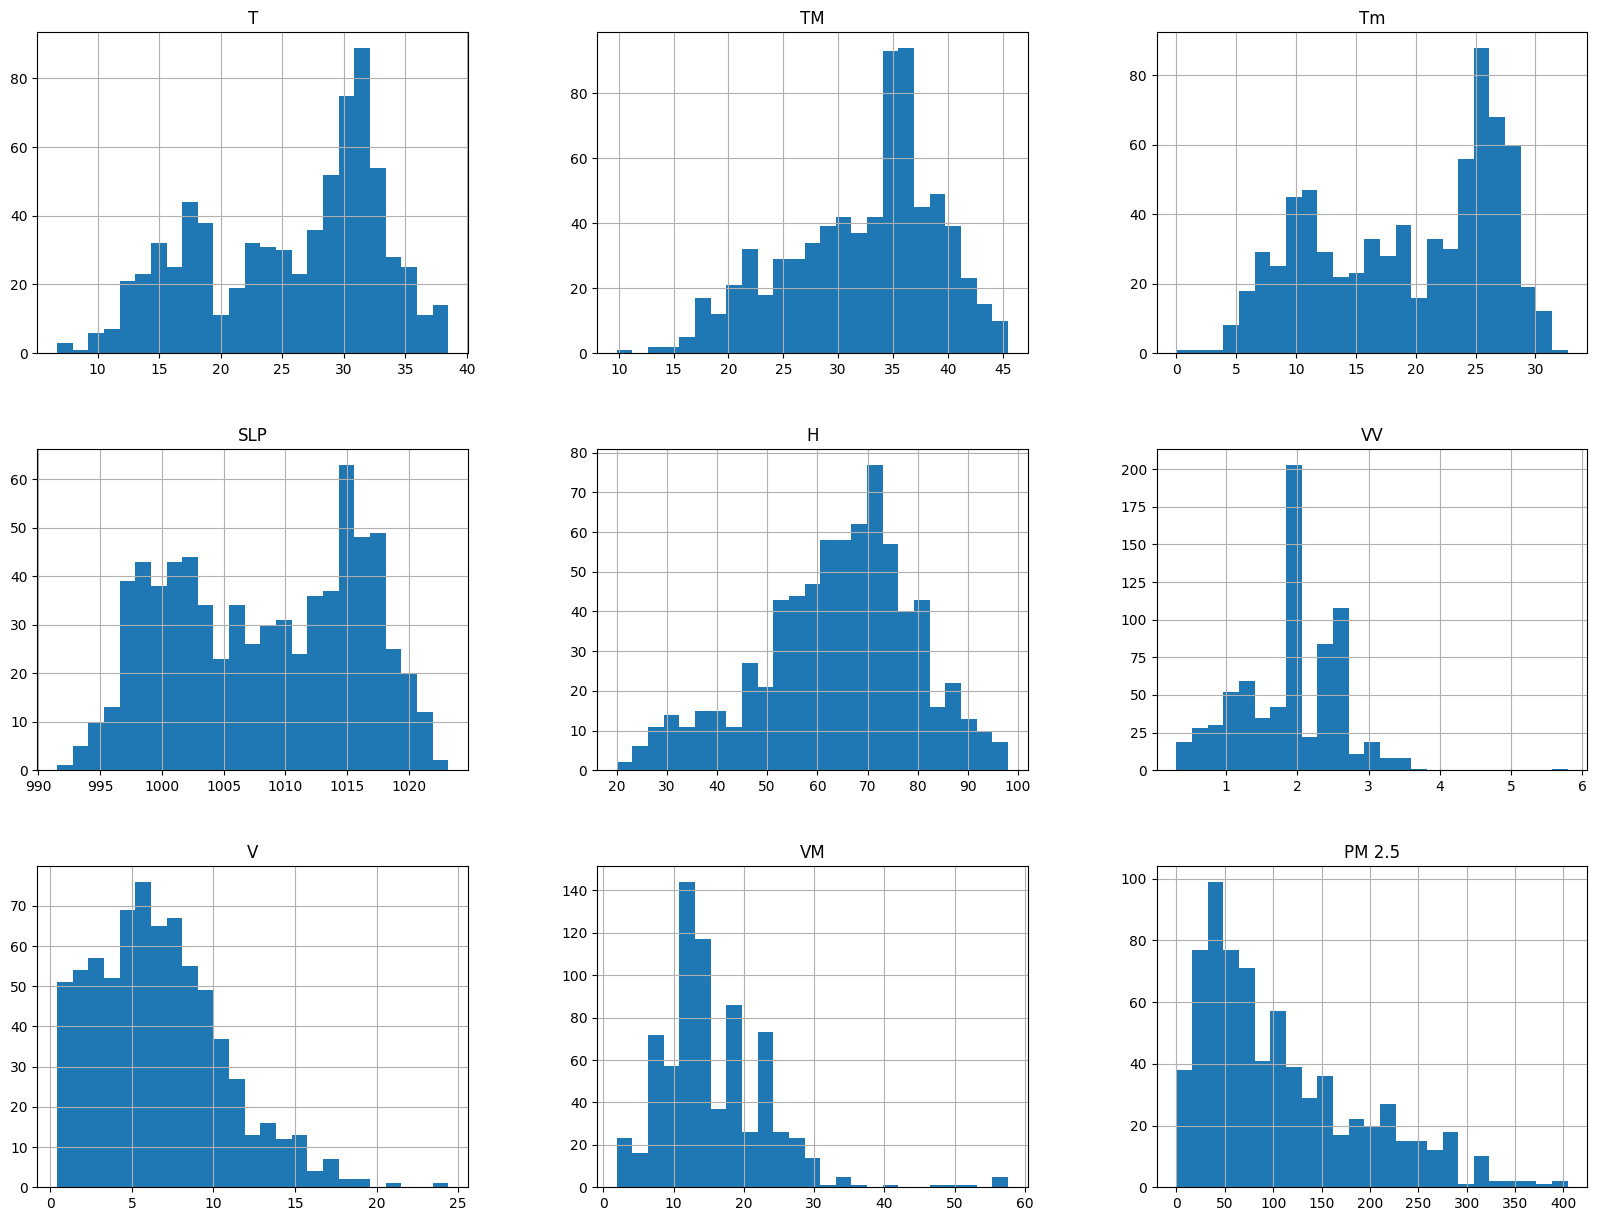

In [ ]:
df.hist(bins=25, figsize=(20,15))

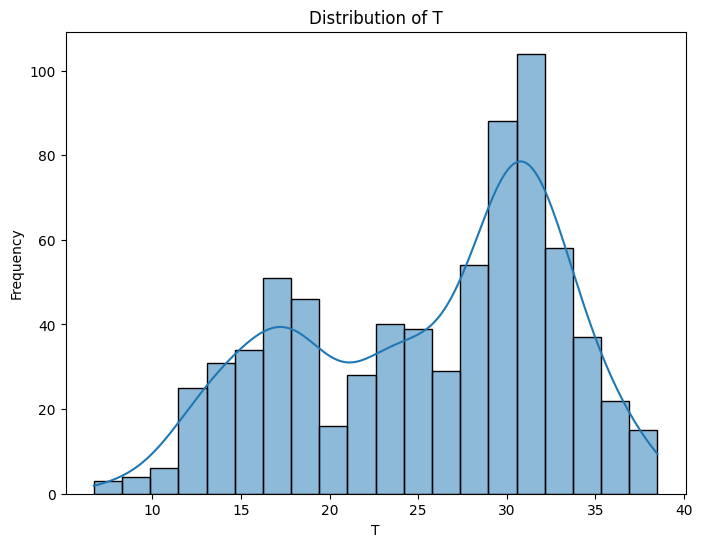

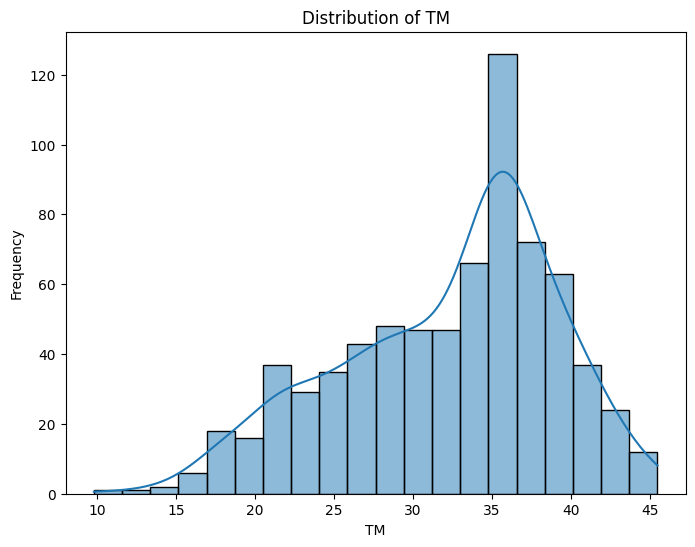

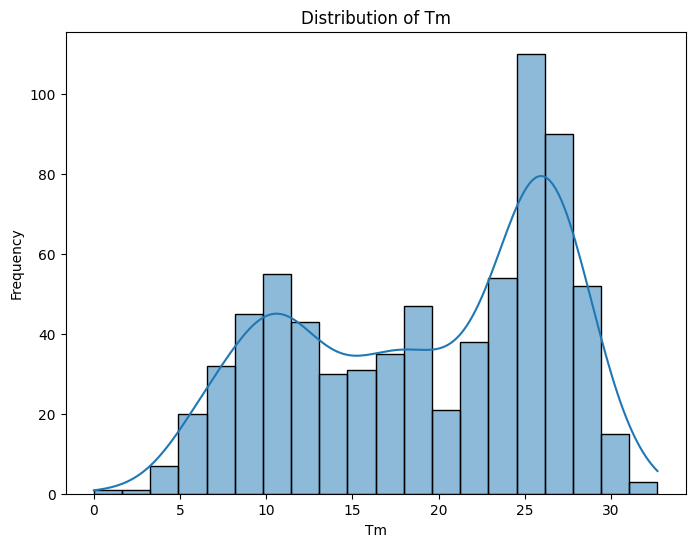

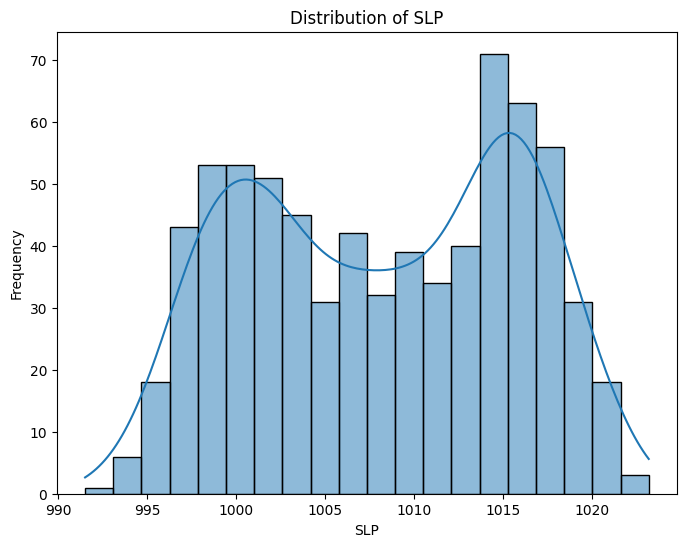

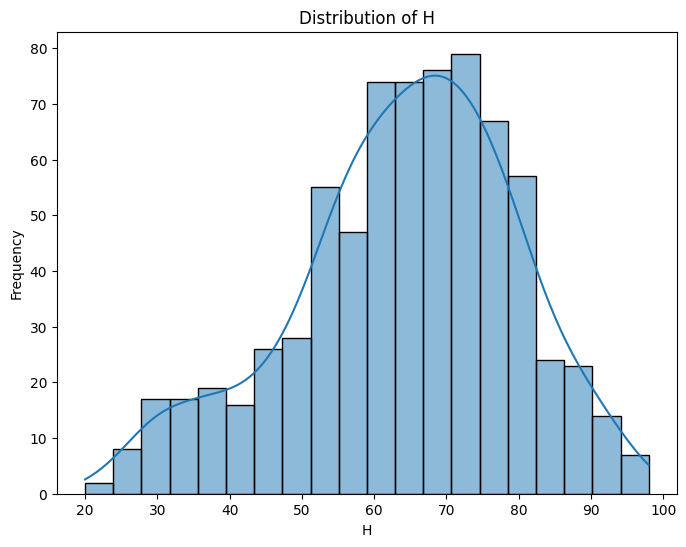

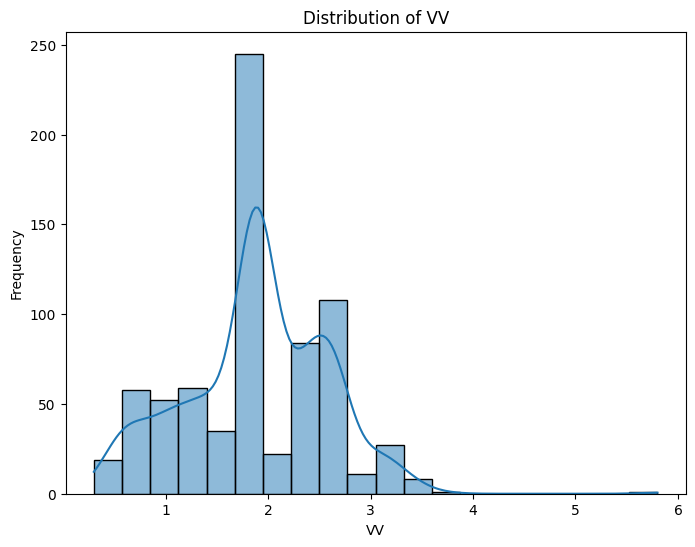

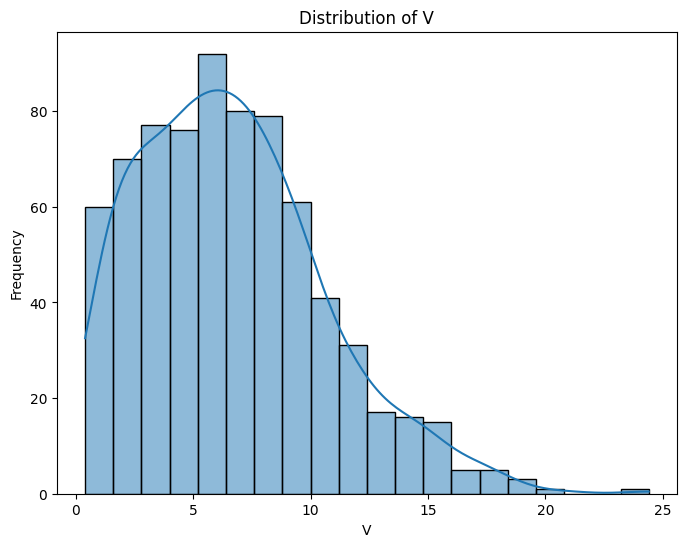

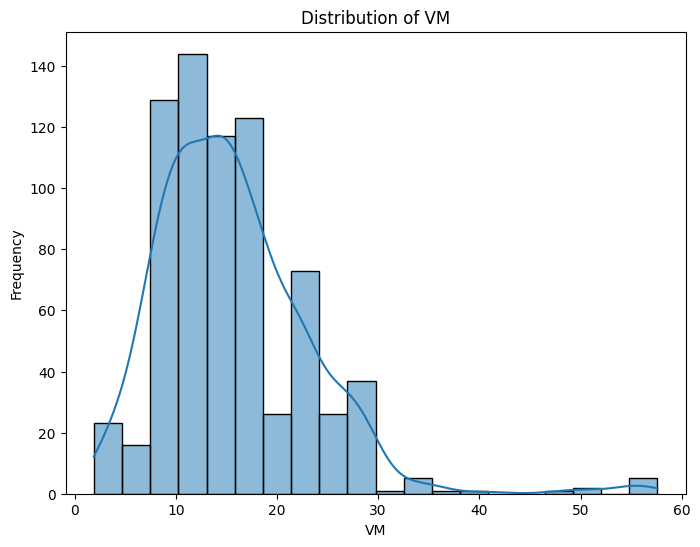

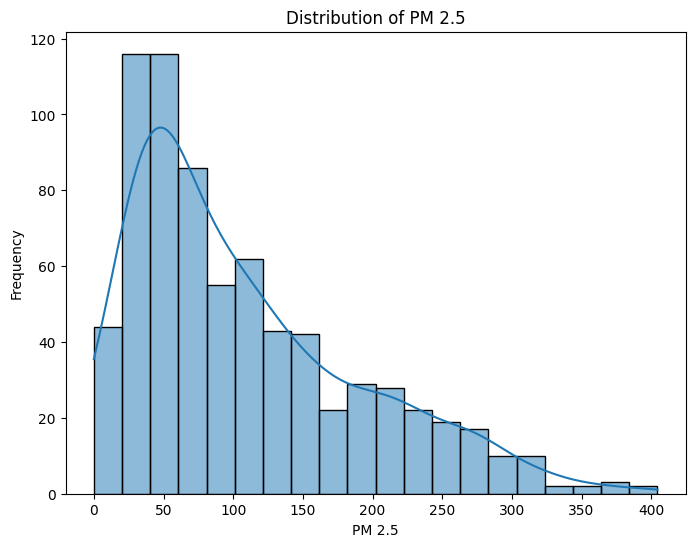

In [ ]:
numerical_cols = df.select_dtypes(include=['float64'])

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

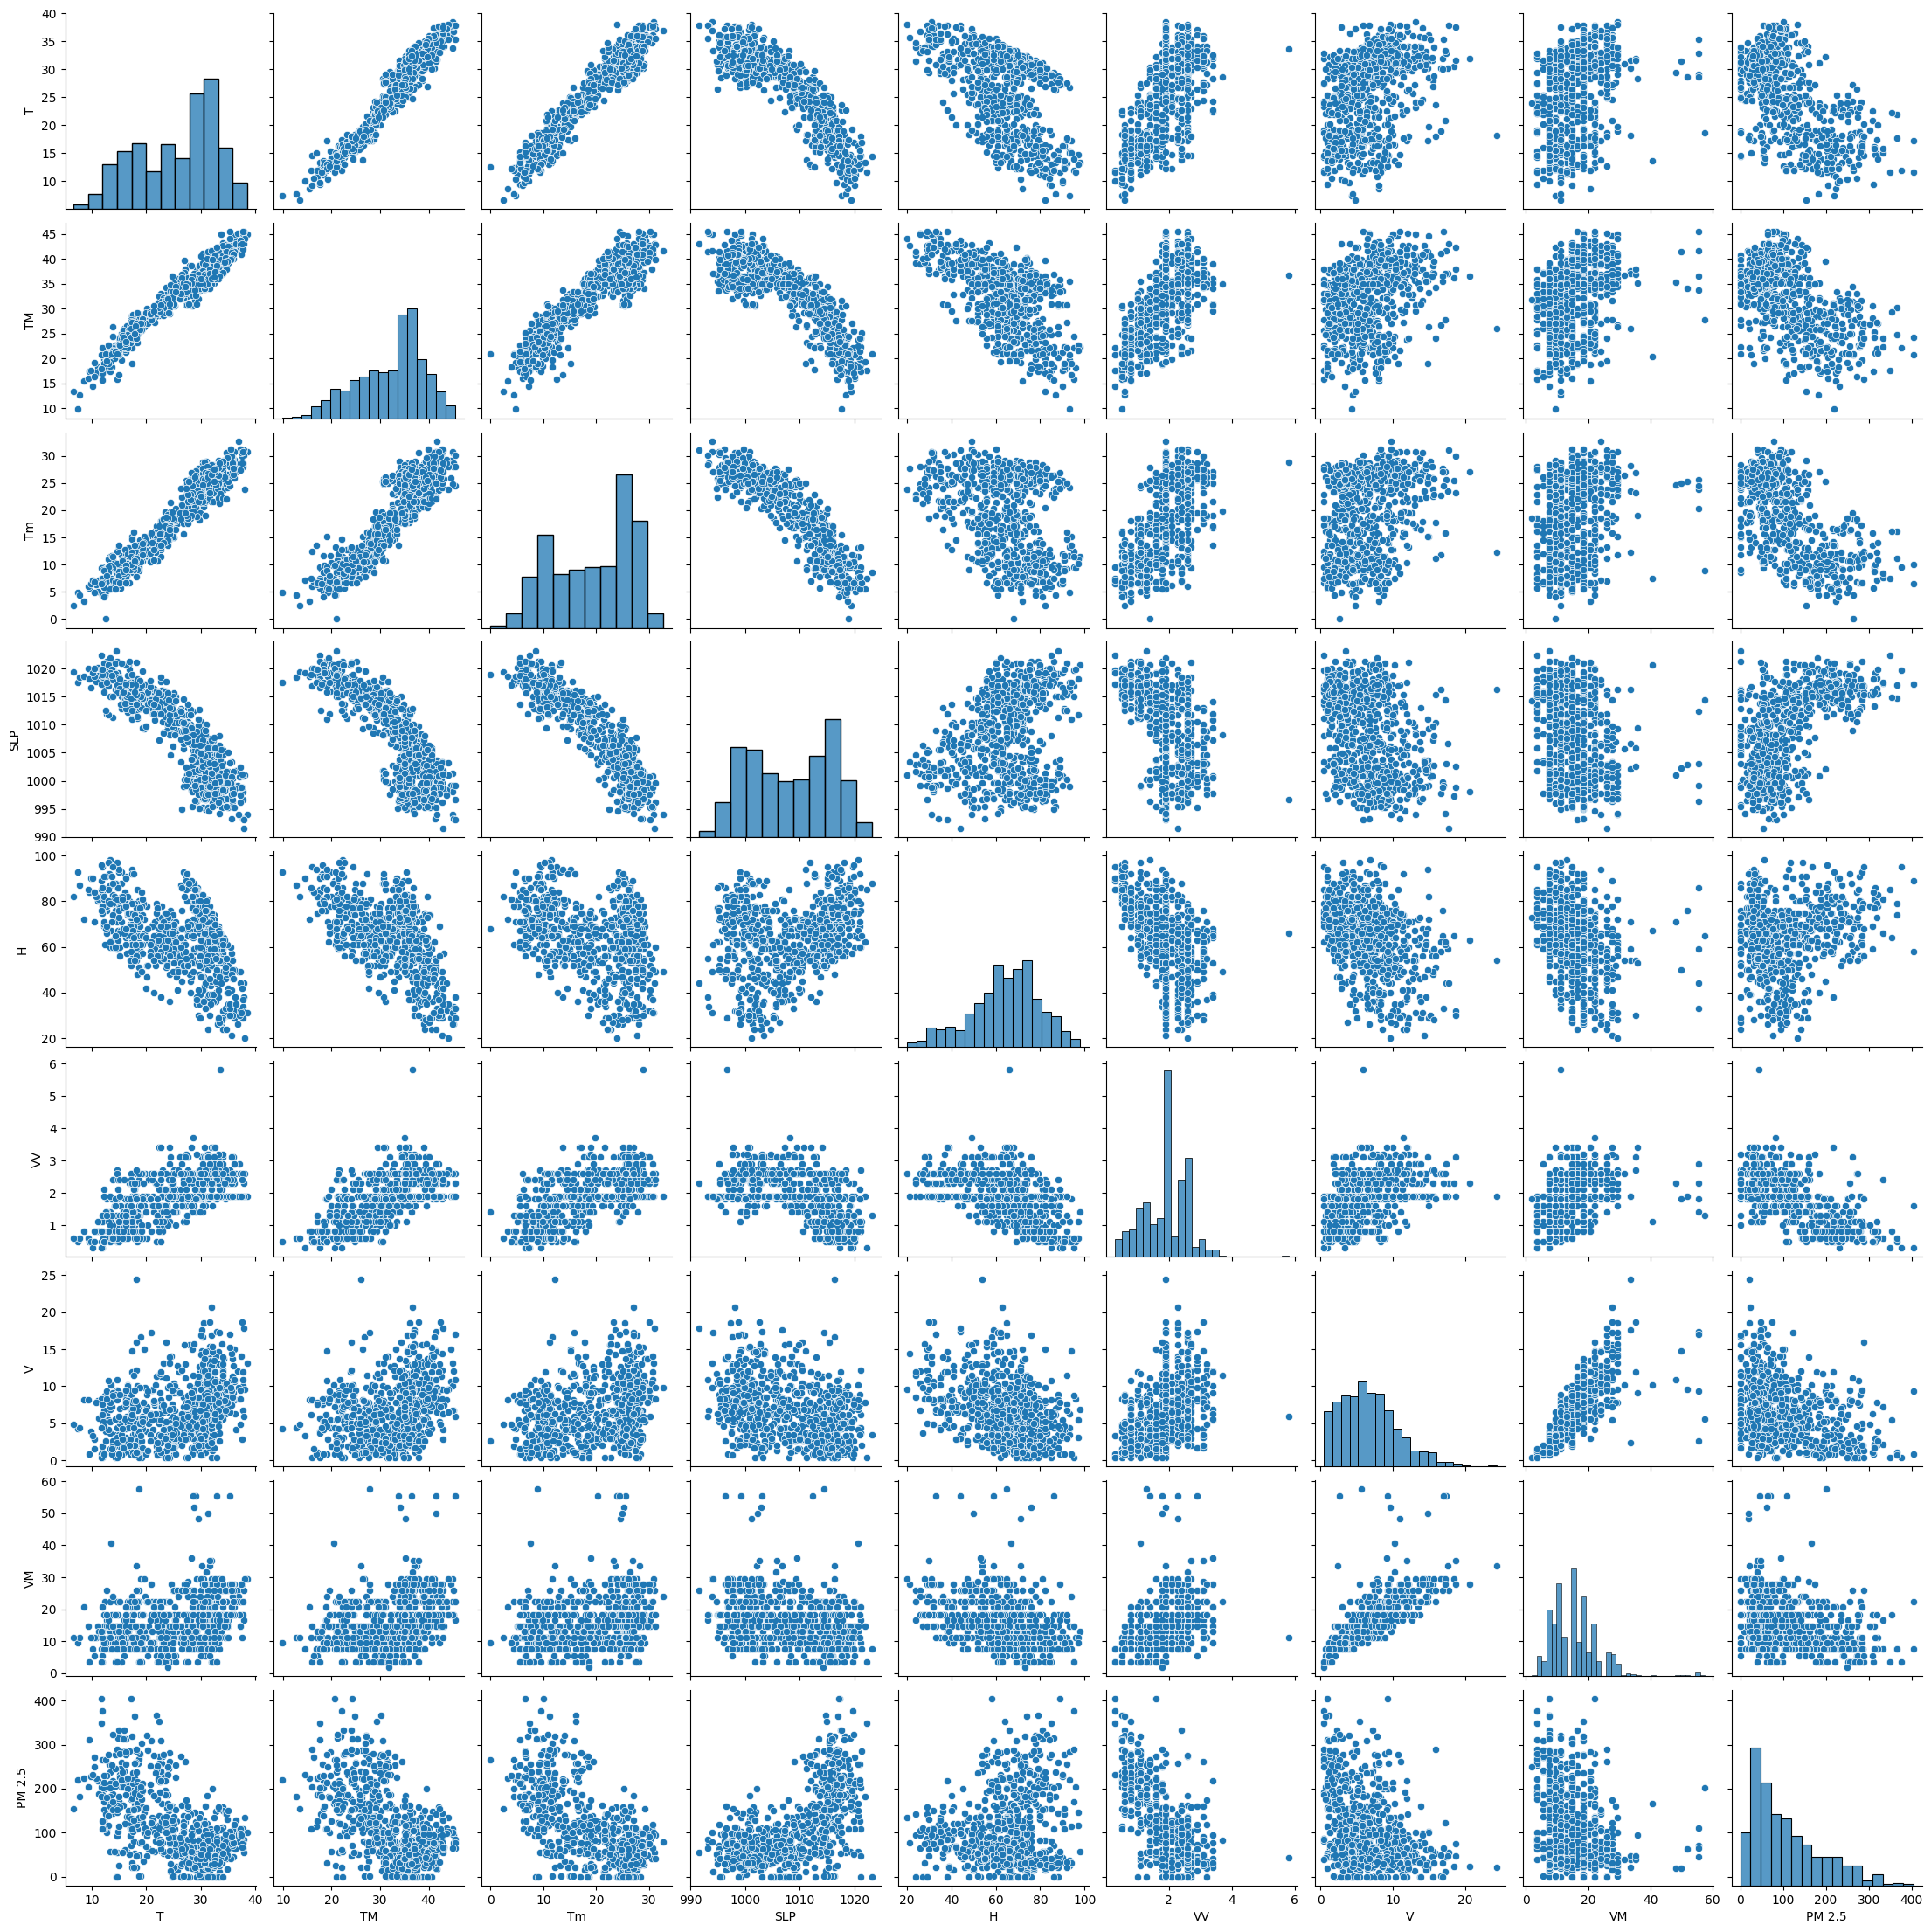

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
VV,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


<Axes: >

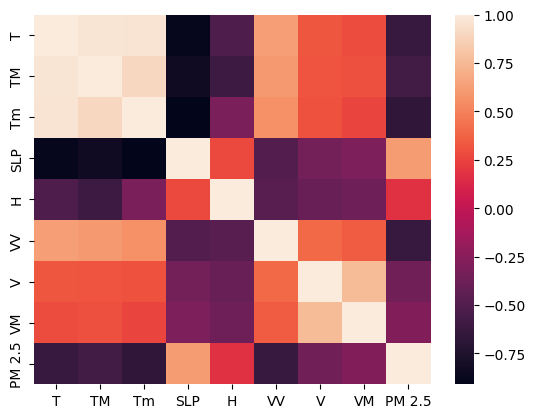

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Print the metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def print_model_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    lis = []
    print("Model Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")
    lis.append(mae)
    lis.append(mse)
    lis.append(rmse)
    lis.append(r2)
    return lis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
metrrics={}

#Linear Reg

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.coef_

array([ 2.63949039e+00,  5.19978529e-01, -7.59811846e+00,  4.93219944e-01,
       -8.37064222e-01, -5.04301355e+01, -2.75417778e+00, -3.92662839e-02])

In [ ]:
y_pred =regressor.predict(X_test)

In [ ]:
metrrics["linear reg"] = print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 40.283355371329385
Mean Squared Error (MSE): 3057.664128674137
Root Mean Squared Error (RMSE): 55.29614931144968
R-squared (R²): 0.5316188612878155


In [ ]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
y_pred

array([ 189.33203792,  242.24961682,  244.4703608 ,   92.25565539,
        127.85314121,   47.02861996,   18.34426231,  204.20476087,
         57.00374483,  114.48318633,  154.31677169,  159.24589032,
        122.23767954,  202.37875249,  193.14582279,  199.31056617,
         77.70532217,   23.59159547,  140.35618721,   51.96119051,
         52.79032253,  171.73215813,   10.02662778,  195.39590735,
        209.65256071,   74.99359732,  108.00250348,  104.43088255,
         36.82517046,  107.70799932,  162.34530641,   97.66978551,
         22.95042947,  144.49906438,  185.04431819,  120.9811852 ,
        147.70774514,  188.20412429,   68.89958492,  161.89925135,
         73.04961493,  223.09338261,   15.64591126,   73.87857951,
        138.14114584,   39.49747947,  238.05967758,   91.3082908 ,
         96.61833849,   35.85279287,  104.00194382,  167.8782917 ,
         33.77103417,  206.3441888 ,  171.79678132,   86.49544245,
        144.56984663,   21.58010751,   61.03874235,  182.79433

In [ ]:
model.feature_importances_

array([0.1772191 , 0.07597807, 0.16438316, 0.15422097, 0.08131533,
       0.25439362, 0.05309319, 0.03939657])

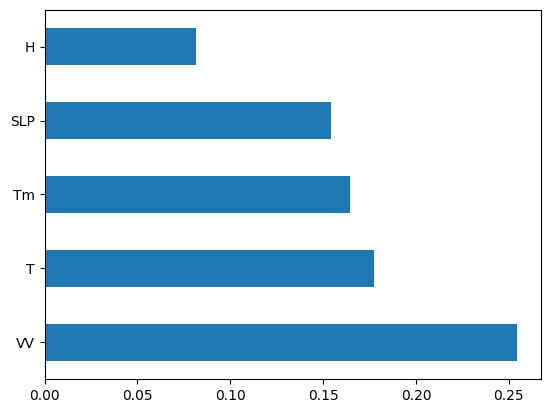

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#Ridge

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-2843.047335380519


In [ ]:
y_pred = ridge_regressor.best_estimator_.predict(X_test)
metrrics["Ridge"] = print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 40.29021557118018
Mean Squared Error (MSE): 3058.827768974696
Root Mean Squared Error (RMSE): 55.306670203282856
R-squared (R²): 0.5314406117659285


#Lasso

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-2842.715768898659


In [ ]:
y_pred =lasso_regressor.best_estimator_.predict(X_test)
metrrics["Lasso"] = print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 40.36505403277766
Mean Squared Error (MSE): 3066.1057237624314
Root Mean Squared Error (RMSE): 55.372427468573484
R-squared (R²): 0.5303257552586333


#RandomForest

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=regressor.predict(X_test)
print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 34.10490639269406
Mean Squared Error (MSE): 2287.5413412153257
Root Mean Squared Error (RMSE): 47.828248360308216
R-squared (R²): 0.6495883219475025


[34.10490639269406, 2287.5413412153257, 47.828248360308216, 0.6495883219475025]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 600, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

print(random_grid)

{'n_estimators': [10, 157, 305, 452, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....max_depth=5, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ....max_depth=5, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=157; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=157; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=157; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=157; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=157; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_estimators=305; total time=   0.0s
[CV] END ...max_depth=5, max_features=auto, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 157, 305, 452,
                                                         600]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)
y_pred=rf_random.best_estimator_.predict(X_test)
metrrics["Random forest"] = print_model_metrics(y_test, y_pred)

{'n_estimators': 157, 'max_features': 'sqrt', 'max_depth': 25}
-2583.7222217187964
Model Performance Metrics:
Mean Absolute Error (MAE): 35.68328380950534
Mean Squared Error (MSE): 2599.1606766626587
Root Mean Squared Error (RMSE): 50.98196422915322
R-squared (R²): 0.601853641799737


#SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 61.24444688029828
Mean Squared Error (MSE): 6911.807558492436
Root Mean Squared Error (RMSE): 83.13728139945663
R-squared (R²): -0.058769099080203446


[61.24444688029828,
 6911.807558492436,
 83.13728139945663,
 -0.058769099080203446]

In [ ]:
# Hyperparameter tuning with Randomized Search
param_dist = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

In [ ]:
random_search = RandomizedSearchCV(SVR(), param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

In [ ]:
print("Best parameters (Randomized Search):", random_search.best_params_)
y_pred = random_search.best_estimator_.predict(X_test)

In [ ]:
metrrics["SVR"] = print_model_metrics(y_test, y_pred)

#XGB

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(X_test)
print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 35.925438029726166
Mean Squared Error (MSE): 2433.936901771027
Root Mean Squared Error (RMSE): 49.33494605014813
R-squared (R²): 0.627163059894531


[35.925438029726166, 2433.936901771027, 49.33494605014813, 0.627163059894531]

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=600, num=5)]
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
subsample = [0.7, 0.6, 0.8]
min_child_weight = list(range(3, 8))
objective = ['reg:squarederror']
params = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'min_child_weight': min_child_weight,
    'objective': objective
}

In [ ]:
search = RandomizedSearchCV(xgb, params, scoring='neg_mean_squared_error',
                            cv=5, n_iter=100, random_state=43, n_jobs=-1, verbose=True)
search.best_estimator_.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [10, 157, 305, 452,
                                                         600],
                                        'objective': ['reg:squarederror'],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=True)

In [ ]:
print(search.best_params_)

{'subsample': 0.6, 'objective': 'reg:squarederror', 'n_estimators': 10, 'min_child_weight': 6, 'max_depth': 10, 'learning_rate': 0.2}


In [ ]:
y_pred=search.best_estimator_.predict(X_test)
metrrics["XGB"] = print_model_metrics(y_test, y_pred)

Model Performance Metrics:
Mean Absolute Error (MAE): 23.548752865726
Mean Squared Error (MSE): 1088.3378138646553
Root Mean Squared Error (RMSE): 32.98996535106782
R-squared (R²): 0.8332855136765799


#KNN

In [ ]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20]
}



In [ ]:
# Create a base model
model = lgb.LGBMRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
# Best parameters
print("Best parameters found by grid search:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
metrrics["LGBM"] = print_model_metrics(y_test, y_pred)

In [ ]:
pd.DataFrame(metrrics, index=['MAE', 'MSE', 'RMSE', 'R2']).T

,MAE,MSE,RMSE,R2
linear reg,40.283355,3057.664129,55.296149,0.531619
Ridge,40.290216,3058.827769,55.306670,0.531441
Lasso,40.365054,3066.105724,55.372427,0.530326
Random forest,35.683284,2599.160677,50.981964,0.601854
XGB,23.548753,1088.337814,32.989965,0.833286
KNN,41.509521,3678.589528,60.651377,0.436504
